<b>Author: Christian Camilo Urcuqui López

Date: 6 december 2018
</b>
# Convolutional Neural Networks 

They are important neural network architecture to resolve problems related with data with more 2D, for example image processing. 

One important thing to make is to normalize each image, because it helps these gradient calculations stay consistent, for example if we have a resolution of 255 we must divide each pixel to this number and we will have a number between zero to one.

Once we have the data normalized the idea is to apply a flattening process (in other words to change the shape or reshape) 

Let's remember the NMIST dataset of handwritten digits, you can see more information in it's 
<a href='../../Deep Learning/notMNIST.ipynb'>Link</a>

### NMIST

In [32]:
from IPython.display import display, Image
from torchvision import datasets, transforms
import torch
import matplotlib.pyplot as plt
import numpy as np

In [26]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))]) # TODO: compose transforms here
dataset = datasets.MNIST('../../../Datasets/MNIST_data/', download=True, transform=transform)

In [23]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ../../../Datasets/MNIST_data/
    Transforms (if any): Compose(
                             ToTensor()
                             Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
                         )
    Target Transforms (if any): None

In [28]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

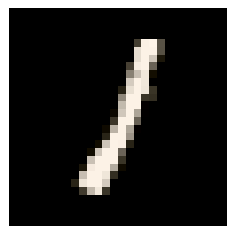

In [33]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=25, shuffle=True) # TODO: use the ImageFolder
images, labels = next(iter(dataloader))
imshow(images[0], normalize=True)

As you can see we have a image composed by gray pixels, so the next idea is to flatten them.

In [34]:
images[0].shape

torch.Size([1, 28, 28])

ValueError: axes don't match array

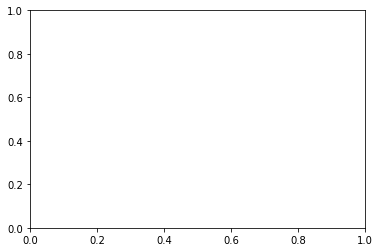

In [38]:
#imshow(images[0].view(1,784))